<a href="https://colab.research.google.com/github/Daweet/2015/blob/master/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">

## **Getting started**
</div>

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

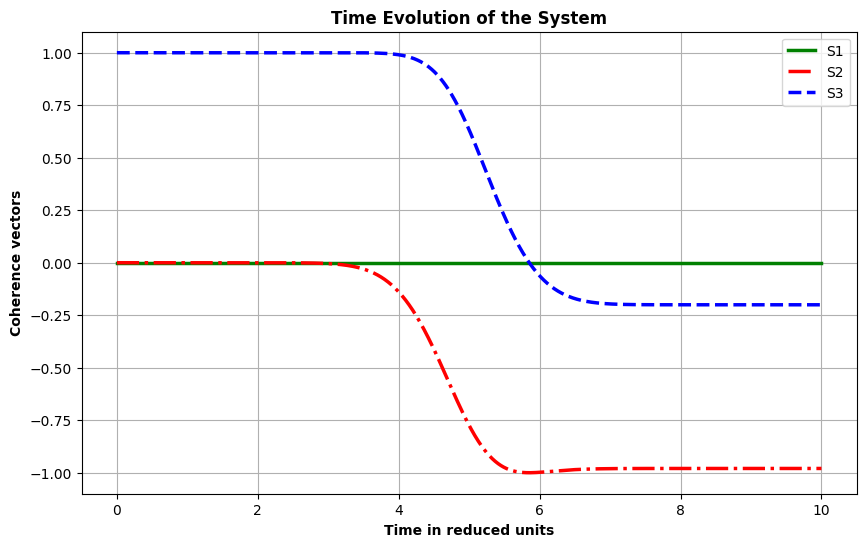

In [47]:
import numpy as np
import matplotlib.pyplot as plt

def g(t, Omega_t):
    """ Time-dependent matrix g(t) with Delta = 0. """
    return np.array([
        [0, 0, 0],
        [0, 0, -Omega_t],
        [0, Omega_t, 0]
    ])

def rk4_step(S, Omega_t, h, t):
    """ Perform a single RK4 step. """
    g_t = g(t, Omega_t)

    k1 = h * np.dot(g_t, S)
    k2 = h * np.dot(g(t + 0.5 * h, Omega(t + 0.5 * h)), S + 0.5 * k1)
    k3 = h * np.dot(g(t + 0.5 * h, Omega(t + 0.5 * h)), S + 0.5 * k2)
    k4 = h * np.dot(g(t + h, Omega(t + h)), S + k3)

    S_next = S + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return S_next

def Omega(t):
    """ Define the pulse profile Omega(t). """
    Omega_0 = 1.0
    tau = 5.0
    sigma = 1.0
    return Omega_0 * np.exp(- (t - tau)**2 / sigma**2)

def integrate_ode(S0, t0, t_end, h):
    """ Integrate the ODE using the RK4 method. """
    n_steps = int((t_end - t0) / h)
    t_values = np.linspace(t0, t_end, n_steps + 1)
    S_values = np.zeros((n_steps + 1, len(S0)))

    S = S0
    S_values[0] = S

    for i in range(n_steps):
        current_time = t_values[i]
        Omega_t = Omega(current_time)
        S = rk4_step(S, Omega_t, h, current_time)
        S_values[i + 1] = S

    return t_values, S_values

# Parameters
S0 = np.array([0, 0, 1])  # Initial condition
t0 = 0# Initial time
t_end = 10# Final time
h = 0.01# Time step# Perform integration
t_values, S_values = integrate_ode(S0, t0, t_end, h)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(t_values, S_values[:, 0], label='S1', color='green', linestyle='-', linewidth=2.5)
plt.plot(t_values, S_values[:, 1], label='S2', color='red', linestyle='-.', linewidth=2.5)
plt.plot(t_values, S_values[:, 2], label='S3', color='blue', linestyle='--', linewidth=2.5)
plt.xlabel('Time in reduced units', fontweight='bold')
plt.ylabel('Coherence vectors', fontweight='bold')
plt.legend()
plt.title('Time Evolution of the System', fontweight='bold')
plt.grid(True)
plt.show()


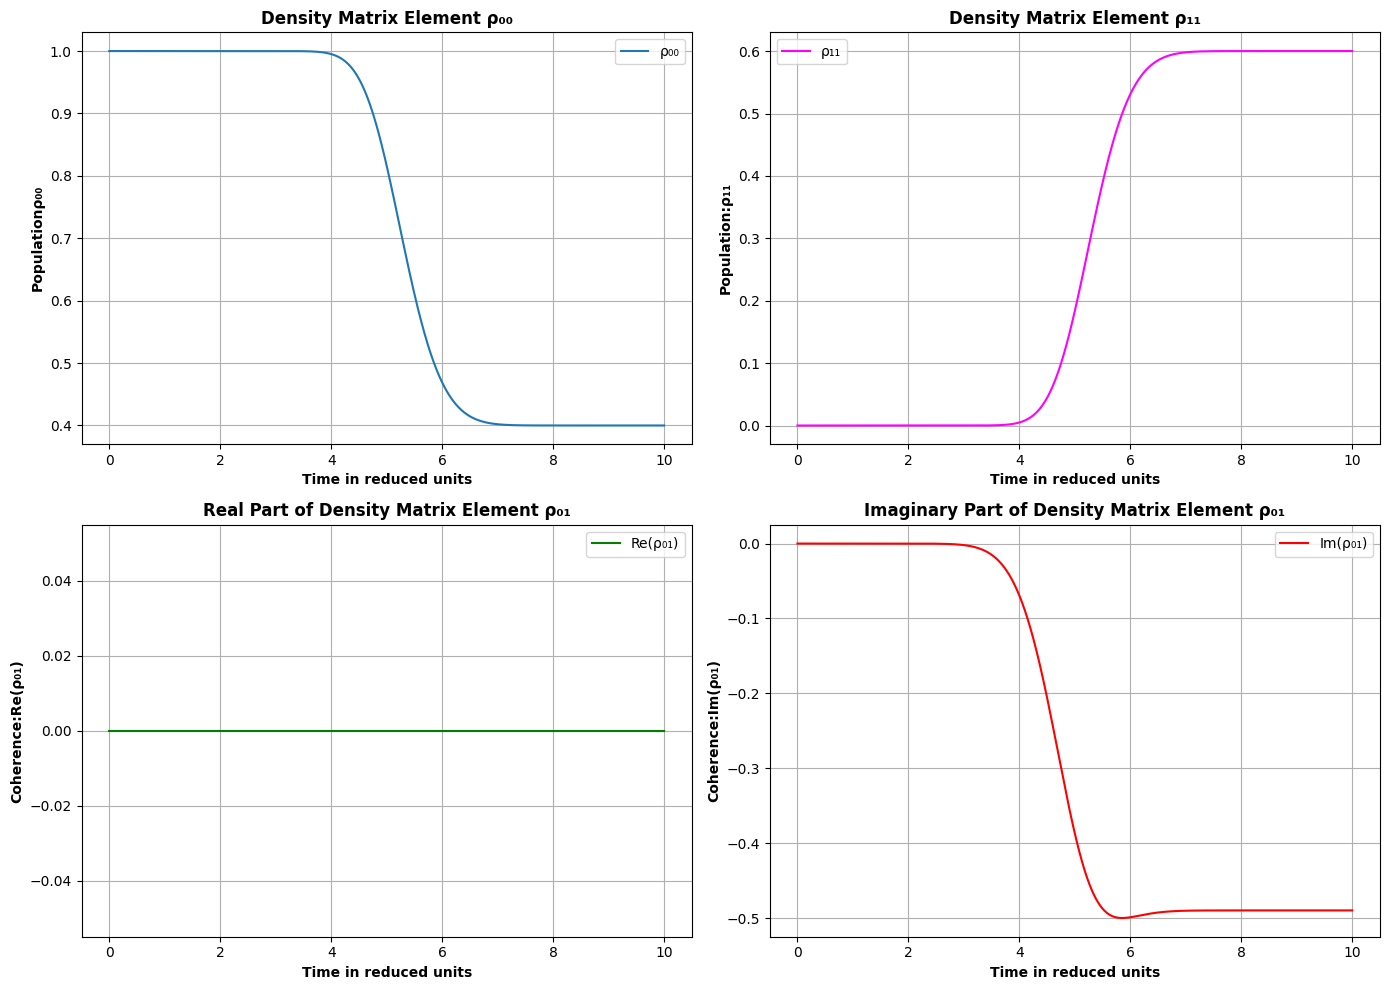

In [19]:

import numpy as np
import matplotlib.pyplot as plt

# Assuming S_values and t_values are already obtained from the
#integration
def compute_density_matrix_elements(S_values):
  #  """ Compute density matrix elements from S_values. """

    S1 = S_values[:, 0]
    S2 = S_values[:, 1]
    S3 = S_values[:, 2]

    rho_00 = 0.5 * (1 + S3)
    rho_11 = 0.5 * (1 - S3)
    rho_01 = 0.5 * (S1 + 1j * S2)
    rho_10 = 0.5 * (S1 - 1j * S2)

    return rho_00, rho_11, rho_01, rho_10

# Assuming t_values and S_values are the results of the integration
rho_00, rho_11, rho_01, rho_10 = compute_density_matrix_elements(S_values)

# Plot results
plt.figure(figsize=(14, 10))

# Plot rho_00
plt.subplot(2, 2, 1)
plt.plot(t_values, rho_00, label='ρ₀₀')
plt.xlabel('Time in reduced units', fontweight='bold')
plt.ylabel('Populationρ₀₀', fontweight='bold')
plt.title('Density Matrix Element ρ₀₀', fontweight='bold')
plt.grid(True)
plt.legend()

# Plot rho_11
plt.subplot(2, 2, 2)
plt.plot(t_values, rho_11, label='ρ₁₁', color='magenta')
plt.xlabel('Time in reduced units', fontweight='bold')
plt.ylabel('Population:ρ₁₁', fontweight='bold')
plt.title('Density Matrix Element ρ₁₁', fontweight='bold')
plt.grid(True)
plt.legend()

# Plot real part of rho_01
plt.subplot(2, 2, 3)
plt.plot(t_values, np.real(rho_01), label='Re(ρ₀₁)', color='green')
plt.xlabel('Time in reduced units', fontweight='bold')
plt.ylabel('Coherence:Re(ρ₀₁)', fontweight='bold')
plt.title('Real Part of Density Matrix Element ρ₀₁', fontweight='bold')
plt.grid(True)
plt.legend()

# Plot imaginary part of rho_01
plt.subplot(2, 2, 4)
plt.plot(t_values, np.imag(rho_01), label='Im(ρ₀₁)', color='red')
plt.xlabel('Time in reduced units', fontweight='bold')
plt.ylabel('Coherence:Im(ρ₀₁)', fontweight='bold')
plt.title('Imaginary Part of Density Matrix Element ρ₀₁', fontweight='bold')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


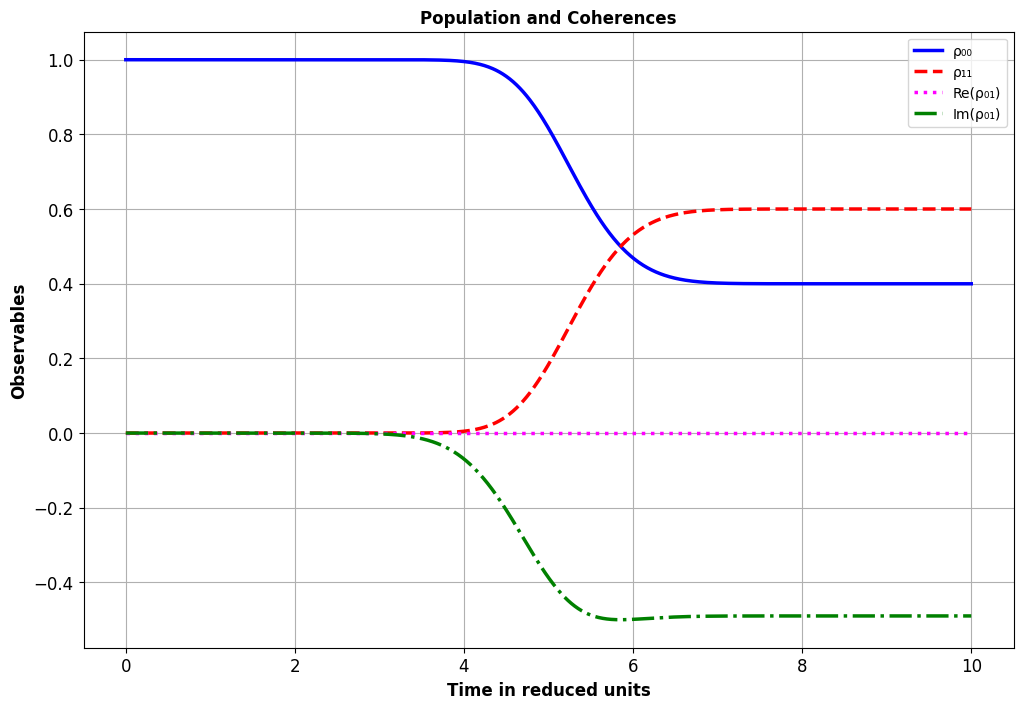

In [48]:
import numpy as np
import matplotlib.pyplot as plt

def g(t, Omega_t):
    """ Time-dependent matrix g(t) with Delta = 0. """
    return np.array([
        [0, 0, 0],
        [0, 0, -Omega_t],
        [0, Omega_t, 0]
    ])

def rk4_step(S, Omega_t, h, t):
    """ Perform a single RK4 step. """
    g_t = g(t, Omega_t)

    k1 = h * np.dot(g_t, S)
    k2 = h * np.dot(g(t + 0.5 * h, Omega(t + 0.5 * h)), S + 0.5 * k1)
    k3 = h * np.dot(g(t + 0.5 * h, Omega(t + 0.5 * h)), S + 0.5 * k2)
    k4 = h * np.dot(g(t + h, Omega(t + h)), S + k3)

    S_next = S + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return S_next

def Omega(t):
    """ Define the pulse profile Omega(t). """
    Omega_0 = 1.0
    tau = 5.0
    sigma = 1.0
    return Omega_0 * np.exp(- (t - tau)**2 / sigma**2)

def integrate_ode(S0, t0, t_end, h):
    """ Integrate the ODE using the RK4 method. """
    n_steps = int((t_end - t0) / h)
    t_values = np.linspace(t0, t_end, n_steps + 1)
    S_values = np.zeros((n_steps + 1, len(S0)))

    S = S0
    S_values[0] = S

    for i in range(n_steps):
        current_time = t_values[i]
        Omega_t = Omega(current_time)
        S = rk4_step(S, Omega_t, h, current_time)
        S_values[i + 1] = S

    return t_values, S_values

def compute_density_matrix_elements(S_values):
    """ Compute density matrix elements from S_values. """
    S1 = S_values[:, 0]
    S2 = S_values[:, 1]
    S3 = S_values[:, 2]

    rho_00 = 0.5 * (1 + S3)
    rho_11 = 0.5 * (1 - S3)
    rho_01 = 0.5 * (S1 + 1j * S2)
    rho_10 = 0.5 * (S1 - 1j * S2)

    return rho_00, rho_11, rho_01, rho_10

# Parameters
S0 = np.array([0, 0, 1])  # Initial condition
t0 = 0# Initial time
t_end = 10# Final time
h = 0.01# Time step# Perform integration
t_values, S_values = integrate_ode(S0, t0, t_end, h)

# Compute density matrix elements
rho_00, rho_11, rho_01, rho_10 = compute_density_matrix_elements(S_values)

# Plot all elements in one plot
plt.figure(figsize=(12, 8))

# Plot rho_00
plt.plot(t_values, rho_00, label='ρ₀₀', color='blue', linestyle='-', linewidth=2.5)

# Plot rho_11
plt.plot(t_values, rho_11, label='ρ₁₁', color='red', linestyle='--', linewidth=2.5)

# Plot real part of rho_01
plt.plot(t_values, np.real(rho_01), label='Re(ρ₀₁)', color='magenta', linestyle=':', linewidth=2.5)

# Plot imaginary part of rho_01
plt.plot(t_values, np.imag(rho_01), label='Im(ρ₀₁)', color='green', linestyle='-.', linewidth=2.5)

plt.xlabel('Time in reduced units', fontsize=12,fontweight='bold')
plt.ylabel('Observables', fontsize=12,fontweight='bold')
plt.title('Population and Coherences', fontweight='bold')

# Make axis numbers bold
plt.tick_params(axis='both', which='major', labelsize=12)

plt.legend()
plt.grid(True)
plt.show()


To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

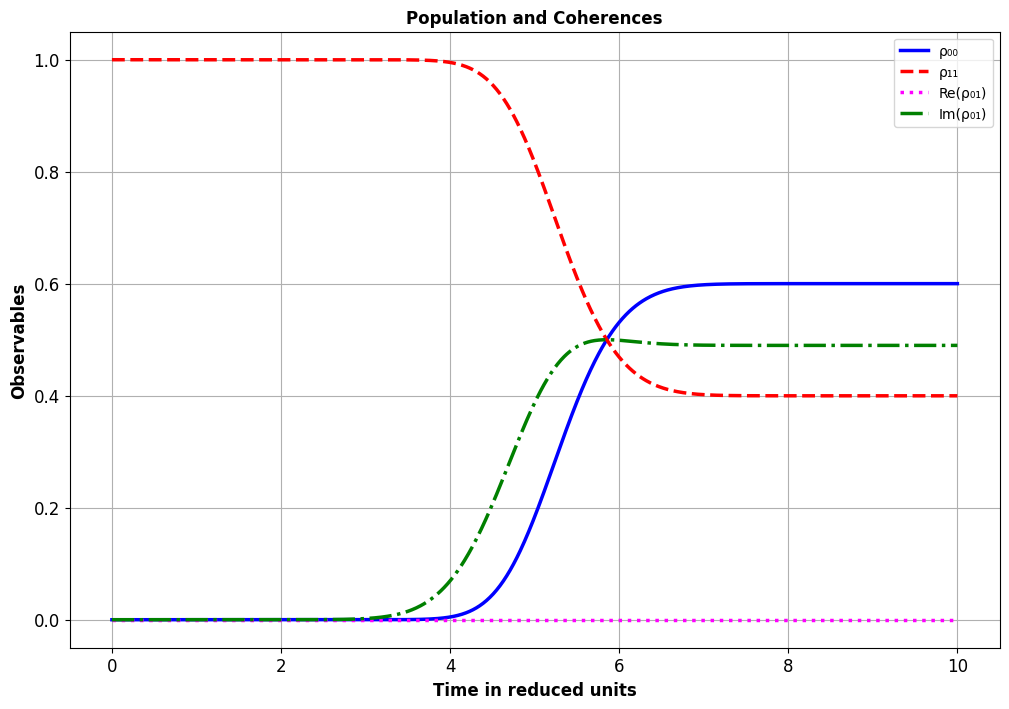

In [49]:
import numpy as np
import matplotlib.pyplot as plt

def g(t, Omega_t):
    """ Time-dependent matrix g(t) with Delta = 0. """
    return np.array([
        [0, 0, 0],
        [0, 0, -Omega_t],
        [0, Omega_t, 0]
    ])

def rk4_step(S, Omega_t, h, t):
    """ Perform a single RK4 step. """
    g_t = g(t, Omega_t)

    k1 = h * np.dot(g_t, S)
    k2 = h * np.dot(g(t + 0.5 * h, Omega(t + 0.5 * h)), S + 0.5 * k1)
    k3 = h * np.dot(g(t + 0.5 * h, Omega(t + 0.5 * h)), S + 0.5 * k2)
    k4 = h * np.dot(g(t + h, Omega(t + h)), S + k3)

    S_next = S + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return S_next

def Omega(t):
    """ Define the pulse profile Omega(t). """
    Omega_0 = 1.0
    tau = 5.0
    sigma = 1.0
    return Omega_0 * np.exp(- (t - tau)**2 / sigma**2)

def integrate_ode(S0, t0, t_end, h):
    """ Integrate the ODE using the RK4 method. """
    n_steps = int((t_end - t0) / h)
    t_values = np.linspace(t0, t_end, n_steps + 1)
    S_values = np.zeros((n_steps + 1, len(S0)))

    S = S0
    S_values[0] = S

    for i in range(n_steps):
        current_time = t_values[i]
        Omega_t = Omega(current_time)
        S = rk4_step(S, Omega_t, h, current_time)
        S_values[i + 1] = S

    return t_values, S_values

def compute_density_matrix_elements(S_values):
    """ Compute density matrix elements from S_values. """
    S1 = S_values[:, 0]
    S2 = S_values[:, 1]
    S3 = S_values[:, 2]

    rho_00 = 0.5 * (1 + S3)
    rho_11 = 0.5 * (1 - S3)
    rho_01 = 0.5 * (S1 + 1j * S2)
    rho_10 = 0.5 * (S1 - 1j * S2)

    return rho_00, rho_11, rho_01, rho_10

# Parameters
S0 = np.array([0, 0, -1])  # Initial condition
t0 = 0# Initial time
t_end = 10# Final time
h = 0.01# Time step# Perform integration
t_values, S_values = integrate_ode(S0, t0, t_end, h)

# Compute density matrix elements
rho_00, rho_11, rho_01, rho_10 = compute_density_matrix_elements(S_values)

# Plot all elements in one plot
plt.figure(figsize=(12, 8))

# Plot rho_00
plt.plot(t_values, rho_00, label='ρ₀₀', color='blue', linestyle='-', linewidth=2.5)

# Plot rho_11
plt.plot(t_values, rho_11, label='ρ₁₁', color='red', linestyle='--', linewidth=2.5)

# Plot real part of rho_01
plt.plot(t_values, np.real(rho_01), label='Re(ρ₀₁)', color='magenta', linestyle=':', linewidth=2.5)

# Plot imaginary part of rho_01
plt.plot(t_values, np.imag(rho_01), label='Im(ρ₀₁)', color='green', linestyle='-.', linewidth=2.5)

plt.xlabel('Time in reduced units', fontsize=12, fontweight='bold')
plt.ylabel('Observables', fontsize=12, fontweight='bold')
plt.title('Population and Coherences', fontsize=12, fontweight='bold')

# Make axis numbers bold
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend()
plt.grid(True)
plt.show()


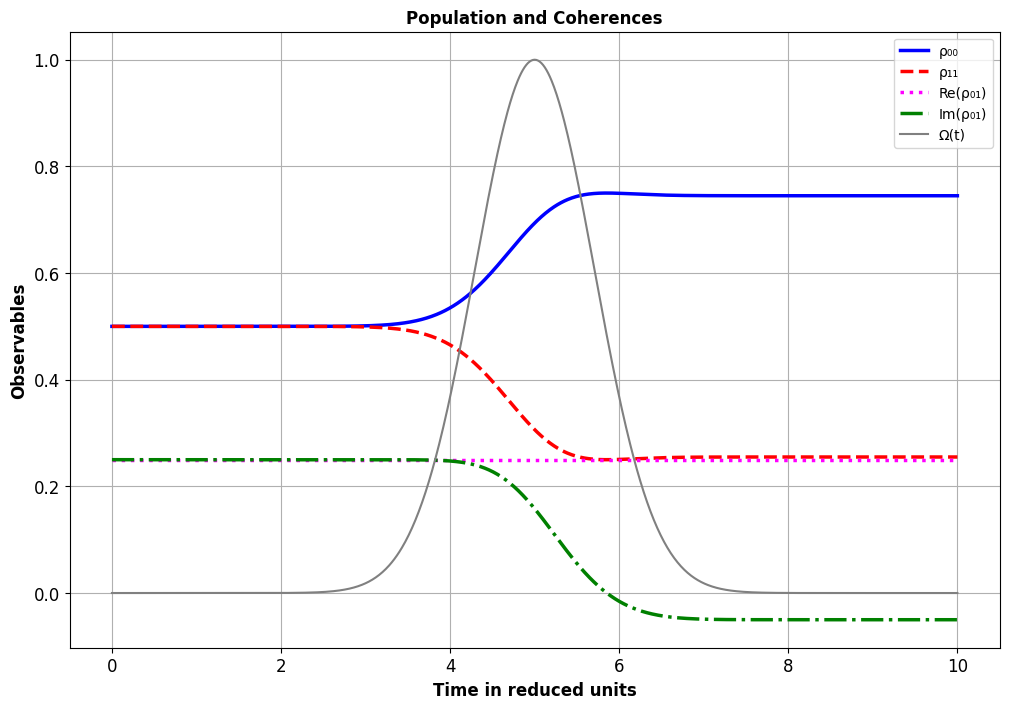

In [50]:
import numpy as np
import matplotlib.pyplot as plt

def g(t, Omega_t):
    """ Time-dependent matrix g(t) with Delta = 0. """
    return np.array([
        [0, 0, 0],
        [0, 0, -Omega_t],
        [0, Omega_t, 0]
    ])

def rk4_step(S, Omega_t, h, t):
    """ Perform a single RK4 step. """
    g_t = g(t, Omega_t)

    k1 = h * np.dot(g_t, S)
    k2 = h * np.dot(g(t + 0.5 * h, Omega(t + 0.5 * h)), S + 0.5 * k1)
    k3 = h * np.dot(g(t + 0.5 * h, Omega(t + 0.5 * h)), S + 0.5 * k2)
    k4 = h * np.dot(g(t + h, Omega(t + h)), S + k3)

    S_next = S + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return S_next

def Omega(t):
    """ Define the pulse profile Omega(t). """
    Omega_0 = 1.0
    tau = 5.0
    sigma = 1.0
    return Omega_0 * np.exp(- (t - tau)**2 / sigma**2)

def integrate_ode(S0, t0, t_end, h):
    """ Integrate the ODE using the RK4 method. """
    n_steps = int((t_end - t0) / h)
    t_values = np.linspace(t0, t_end, n_steps + 1)
    S_values = np.zeros((n_steps + 1, len(S0)))

    S = S0
    S_values[0] = S

    for i in range(n_steps):
        current_time = t_values[i]
        Omega_t = Omega(current_time)
        S = rk4_step(S, Omega_t, h, current_time)
        S_values[i + 1] = S

    return t_values, S_values

def compute_density_matrix_elements(S_values):
    """ Compute density matrix elements from S_values. """
    S1 = S_values[:, 0]
    S2 = S_values[:, 1]
    S3 = S_values[:, 2]

    rho_00 = 0.5 * (1 + S3)
    rho_11 = 0.5 * (1 - S3)
    rho_01 = 0.5 * (S1 + 1j * S2)
    rho_10 = 0.5 * (S1 - 1j * S2)

    return rho_00, rho_11, rho_01, rho_10

# Parameters
S0 = np.array([0.5, 0.5, 0])  # Initial condition
t0 = 0# Initial time
t_end = 10# Final time
h = 0.01# Time step# Perform integration
t_values, S_values = integrate_ode(S0, t0, t_end, h)

# Compute density matrix elements
rho_00, rho_11, rho_01, rho_10 = compute_density_matrix_elements(S_values)

# Compute the pulse profile
pulse_profile = Omega(t_values)

# Plot all elements in one plot
plt.figure(figsize=(12, 8))

# Plot rho_00
plt.plot(t_values, rho_00, label='ρ₀₀', color='blue', linestyle='-', linewidth=2.5)

# Plot rho_11
plt.plot(t_values, rho_11, label='ρ₁₁', color='red', linestyle='--', linewidth=2.5)

# Plot real part of rho_01
plt.plot(t_values, np.real(rho_01), label='Re(ρ₀₁)', color='magenta', linestyle=':', linewidth=2.5)

# Plot imaginary part of rho_01
plt.plot(t_values, np.imag(rho_01), label='Im(ρ₀₁)', color='green', linestyle='-.', linewidth=2.5)

# Plot the pulse profile
plt.plot(t_values, pulse_profile, label='Ω(t)', color='gray')

plt.xlabel('Time in reduced units', fontsize=12, fontweight='bold')
plt.ylabel('Observables', fontsize=12, fontweight='bold')
plt.title('Population and Coherences', fontsize=12, fontweight='bold')

# Make axis numbers bold
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend()
plt.grid(True)
plt.show()


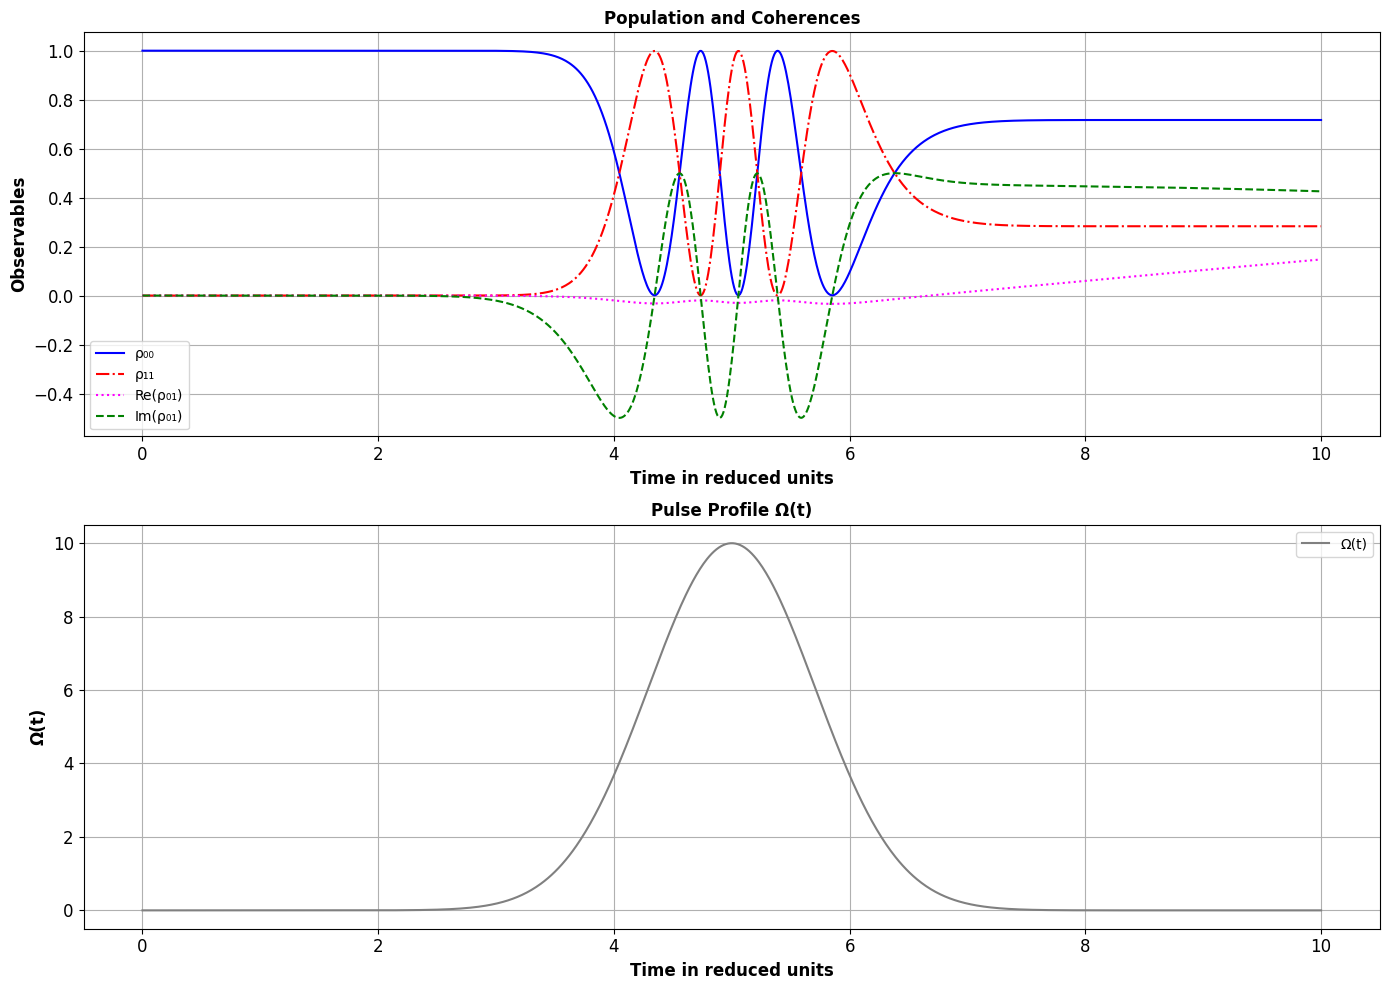

In [44]:
import numpy as np
import matplotlib.pyplot as plt

def g(t, Delta, Omega_t):
    """ Time-dependent matrix g(t) with given Delta. """
    return np.array([
        [0, Delta, 0],
        [-Delta, 0, -Omega_t],
        [0, Omega_t, 0]
    ])

def rk4_step(S, Delta, Omega_t, h, t):
    """ Perform a single RK4 step. """
    g_t = g(t, Delta, Omega_t)

    k1 = h * np.dot(g_t, S)
    k2 = h * np.dot(g(t + 0.5 * h, Delta, Omega(t + 0.5 * h)), S + 0.5 * k1)
    k3 = h * np.dot(g(t + 0.5 * h, Delta, Omega(t + 0.5 * h)), S + 0.5 * k2)
    k4 = h * np.dot(g(t + h, Delta, Omega(t + h)), S + k3)

    S_next = S + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return S_next

def Omega(t):
    """ Define the pulse profile Omega(t). """
    Omega_0 = 10
    tau = 5.0
    sigma = 1.0
    return Omega_0 * np.exp(- (t - tau)**2 / sigma**2)

def integrate_ode(S0, Delta, t0, t_end, h):
    """ Integrate the ODE using the RK4 method with Delta. """
    n_steps = int((t_end - t0) / h)
    t_values = np.linspace(t0, t_end, n_steps + 1)
    S_values = np.zeros((n_steps + 1, len(S0)))

    S = S0
    S_values[0] = S

    for i in range(n_steps):
        current_time = t_values[i]
        Omega_t = Omega(current_time)
        S = rk4_step(S, Delta, Omega_t, h, current_time)
        S_values[i + 1] = S

    return t_values, S_values

def compute_density_matrix_elements(S_values):
    """ Compute density matrix elements from S_values. """
    S1 = S_values[:, 0]
    S2 = S_values[:, 1]
    S3 = S_values[:, 2]

    rho_00 = 0.5 * (1 + S3)
    rho_11 = 0.5 * (1 - S3)
    rho_01 = 0.5 * (S1 + 1j * S2)
    rho_10 = 0.5 * (S1 - 1j * S2)

    return rho_00, rho_11, rho_01, rho_10

# Parameters
Omega_0 = 1.0# Example value for Omega_0
Delta = Omega_0 / 10# Delta = Omega_0 / 10
S0 = np.array([0, 0, 1])  # Initial condition
t0 = 0# Initial time
t_end = 10# Final time
h = 0.01# Time step# Perform integration
t_values, S_values = integrate_ode(S0, Delta, t0, t_end, h)

# Compute density matrix elements
rho_00, rho_11, rho_01, rho_10 = compute_density_matrix_elements(S_values)

# Compute the pulse profile
pulse_profile = Omega(t_values)

# Plot all elements in one plot
plt.figure(figsize=(14, 10))

# Plot density matrix elements
plt.subplot(2, 1, 1)
plt.plot(t_values, rho_00, label='ρ₀₀', color='blue', linestyle='-')
plt.plot(t_values, rho_11, label='ρ₁₁', color='red', linestyle='-.')
plt.plot(t_values, np.real(rho_01), label='Re(ρ₀₁)', color='magenta', linestyle=':')
plt.plot(t_values, np.imag(rho_01), label='Im(ρ₀₁)', color='green', linestyle='--')
plt.xlabel('Time in reduced units', fontsize=12, fontweight='bold')
plt.ylabel('Observables', fontsize=12, fontweight='bold')
plt.title('Population and Coherences', fontsize=12, fontweight='bold')
# Make axis numbers bold
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend()
plt.grid(True)

# Plot the pulse profile
plt.subplot(2, 1, 2)
plt.plot(t_values, pulse_profile, label='Ω(t)', color='gray')
plt.xlabel('Time in reduced units', fontsize=12, fontweight='bold')
plt.ylabel('Ω(t)', fontsize=12, fontweight='bold')
plt.title('Pulse Profile Ω(t)', fontsize=12, fontweight='bold')
# Make axis numbers bold
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

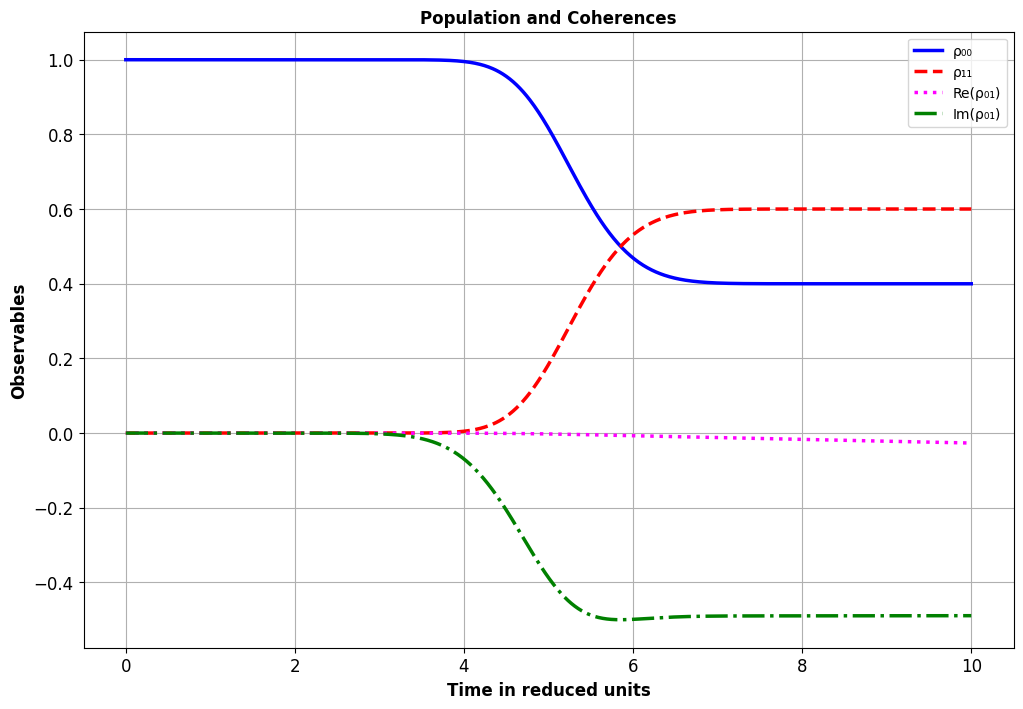

In [51]:
import numpy as np
import matplotlib.pyplot as plt

def g(t, Delta, Omega_t):
    """ Time-dependent matrix g(t) with given Delta. """
    return np.array([
        [0, Delta, 0],
        [-Delta, 0, -Omega_t],
        [0, Omega_t, 0]
    ])

def rk4_step(S, Delta, Omega_t, h, t):
    """ Perform a single RK4 step. """
    g_t = g(t, Delta, Omega_t)

    k1 = h * np.dot(g_t, S)
    k2 = h * np.dot(g(t + 0.5 * h, Delta, Omega(t + 0.5 * h)), S + 0.5 * k1)
    k3 = h * np.dot(g(t + 0.5 * h, Delta, Omega(t + 0.5 * h)), S + 0.5 * k2)
    k4 = h * np.dot(g(t + h, Delta, Omega(t + h)), S + k3)

    S_next = S + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return S_next

def Omega(t):
    """ Define the pulse profile Omega(t). """
    Omega_0 = 1.0
    tau = 5.0
    sigma = 1.0
    return Omega_0 * np.exp(- (t - tau)**2 / sigma**2)

def integrate_ode(S0, Delta, t0, t_end, h):
    """ Integrate the ODE using the RK4 method with Delta. """
    n_steps = int((t_end - t0) / h)
    t_values = np.linspace(t0, t_end, n_steps + 1)
    S_values = np.zeros((n_steps + 1, len(S0)))

    S = S0
    S_values[0] = S

    for i in range(n_steps):
        current_time = t_values[i]
        Omega_t = Omega(current_time)
        S = rk4_step(S, Delta, Omega_t, h, current_time)
        S_values[i + 1] = S

    return t_values, S_values

def compute_density_matrix_elements(S_values):
    """ Compute density matrix elements from S_values. """
    S1 = S_values[:, 0]
    S2 = S_values[:, 1]
    S3 = S_values[:, 2]

    rho_00 = 0.5 * (1 + S3)
    rho_11 = 0.5 * (1 - S3)
    rho_01 = 0.5 * (S1 + 1j * S2)
    rho_10 = 0.5 * (S1 - 1j * S2)

    return rho_00, rho_11, rho_01, rho_10

# Parameters
Omega_0 = 1.0# Example value for Omega_0
Delta = Omega_0 / 100# Delta = Omega_0 / 10
S0 = np.array([0, 0, 1])  # Initial condition
t0 = 0# Initial time
t_end = 10# Final time
h = 0.01# Time step# Perform integration
t_values, S_values = integrate_ode(S0, Delta, t0, t_end, h)

# Compute density matrix elements
rho_00, rho_11, rho_01, rho_10 = compute_density_matrix_elements(S_values)

# Plot all elements in one plot
plt.figure(figsize=(12, 8))

# Plot rho_00
plt.plot(t_values, rho_00, label='ρ₀₀', color='blue', linestyle='-', linewidth=2.5)

# Plot rho_11
plt.plot(t_values, rho_11, label='ρ₁₁', color='red', linestyle='--', linewidth=2.5)

# Plot real part of rho_01
plt.plot(t_values, np.real(rho_01), label='Re(ρ₀₁)', color='magenta', linestyle=':', linewidth=2.5)

# Plot imaginary part of rho_01
plt.plot(t_values, np.imag(rho_01), label='Im(ρ₀₁)', color='green', linestyle='-.', linewidth=2.5)

plt.xlabel('Time in reduced units', fontsize=12, fontweight='bold')
plt.ylabel('Observables', fontsize=12, fontweight='bold')
plt.title('Population and Coherences', fontsize=12, fontweight='bold')

# Make axis numbers bold
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend()
plt.grid(True)
plt.show()


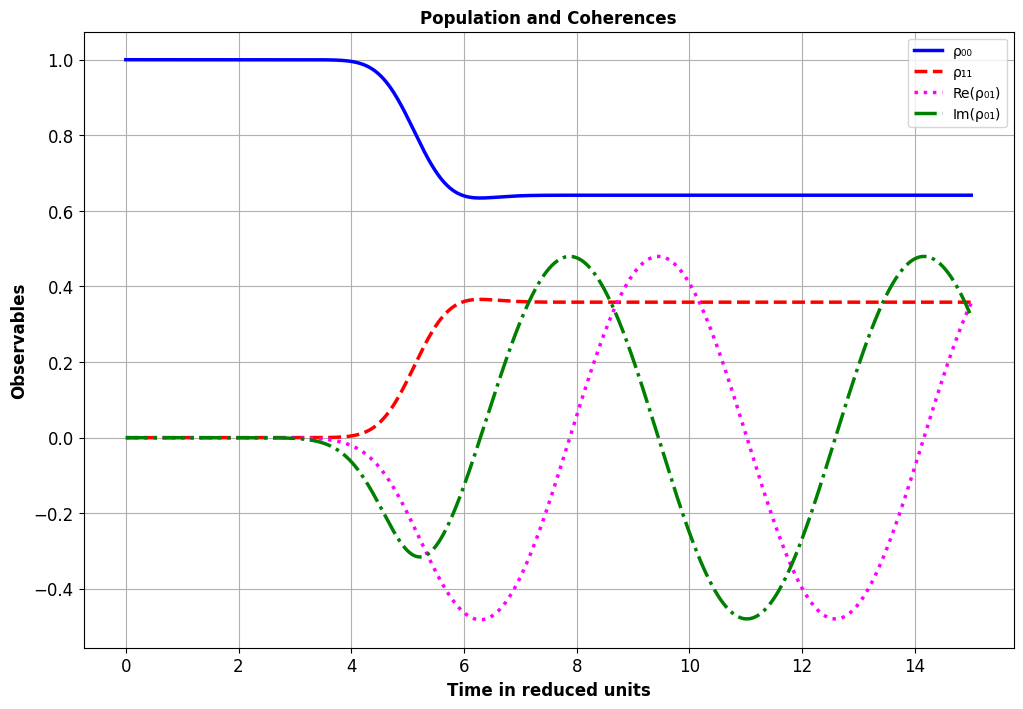

In [52]:
import numpy as np
import matplotlib.pyplot as plt

def g(t, Delta, Omega_t):
    """ Time-dependent matrix g(t) with given Delta. """
    return np.array([
        [0, Delta, 0],
        [-Delta, 0, -Omega_t],
        [0, Omega_t, 0]
    ])

def rk4_step(S, Delta, Omega_t, h, t):
    """ Perform a single RK4 step. """
    g_t = g(t, Delta, Omega_t)

    k1 = h * np.dot(g_t, S)
    k2 = h * np.dot(g(t + 0.5 * h, Delta, Omega(t + 0.5 * h)), S + 0.5 * k1)
    k3 = h * np.dot(g(t + 0.5 * h, Delta, Omega(t + 0.5 * h)), S + 0.5 * k2)
    k4 = h * np.dot(g(t + h, Delta, Omega(t + h)), S + k3)

    S_next = S + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return S_next

def Omega(t):
    """ Define the pulse profile Omega(t). """
    Omega_0 = 1.0
    tau = 5.0
    sigma = 1.0
    return Omega_0 * np.exp(- (t - tau)**2 / sigma**2)

def integrate_ode(S0, Delta, t0, t_end, h):
    """ Integrate the ODE using the RK4 method with Delta. """
    n_steps = int((t_end - t0) / h)
    t_values = np.linspace(t0, t_end, n_steps + 1)
    S_values = np.zeros((n_steps + 1, len(S0)))

    S = S0
    S_values[0] = S

    for i in range(n_steps):
        current_time = t_values[i]
        Omega_t = Omega(current_time)
        S = rk4_step(S, Delta, Omega_t, h, current_time)
        S_values[i + 1] = S

    return t_values, S_values

def compute_density_matrix_elements(S_values):
    """ Compute density matrix elements from S_values. """
    S1 = S_values[:, 0]
    S2 = S_values[:, 1]
    S3 = S_values[:, 2]

    rho_00 = 0.5 * (1 + S3)
    rho_11 = 0.5 * (1 - S3)
    rho_01 = 0.5 * (S1 + 1j * S2)
    rho_10 = 0.5 * (S1 - 1j * S2)

    return rho_00, rho_11, rho_01, rho_10

# Parameters
Omega_0 = 1.0# Example value for Omega_0
Delta = Omega_0 / 1# Delta = Omega_0 / 10
S0 = np.array([0, 0, 1])  # Initial condition
t0 = 0# Initial time
t_end = 15.0# Final time
h = 0.01# Time step# Perform integration
t_values, S_values = integrate_ode(S0, Delta, t0, t_end, h)

# Compute density matrix elements
rho_00, rho_11, rho_01, rho_10 = compute_density_matrix_elements(S_values)

# Plot all elements in one plot
plt.figure(figsize=(12, 8))

# Plot rho_00
plt.plot(t_values, rho_00, label='ρ₀₀', color='blue', linestyle='-', linewidth=2.5)

# Plot rho_11
plt.plot(t_values, rho_11, label='ρ₁₁', color='red', linestyle='--', linewidth=2.5)

# Plot real part of rho_01
plt.plot(t_values, np.real(rho_01), label='Re(ρ₀₁)', color='magenta', linestyle=':', linewidth=2.5)

# Plot imaginary part of rho_01
plt.plot(t_values, np.imag(rho_01), label='Im(ρ₀₁)', color='green', linestyle='-.', linewidth=2.5)

plt.xlabel('Time in reduced units', fontsize=12, fontweight='bold')
plt.ylabel('Observables', fontsize=12, fontweight='bold')
plt.title('Population and Coherences', fontsize=12, fontweight='bold')

# Make axis numbers bold
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend()
plt.grid(True)
plt.show()


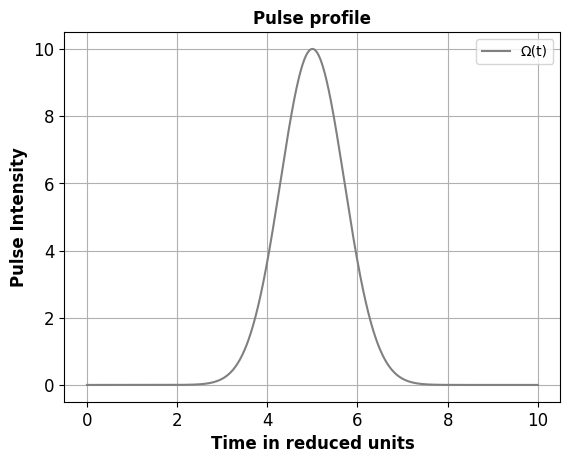

In [46]:
# Plot the pulse profile
plt.plot(t_values, pulse_profile, label='Ω(t)', color='gray')

plt.xlabel('Time in reduced units', fontsize=12, fontweight='bold')
plt.ylabel('Pulse Intensity', fontsize=12, fontweight='bold')
plt.title('Pulse profile', fontsize=12, fontweight='bold')

# Make axis numbers bold
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-57-9bd080d2da4e>:24: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  Omega_prime = cumtrapz(Omega_values, t_values, initial=0)


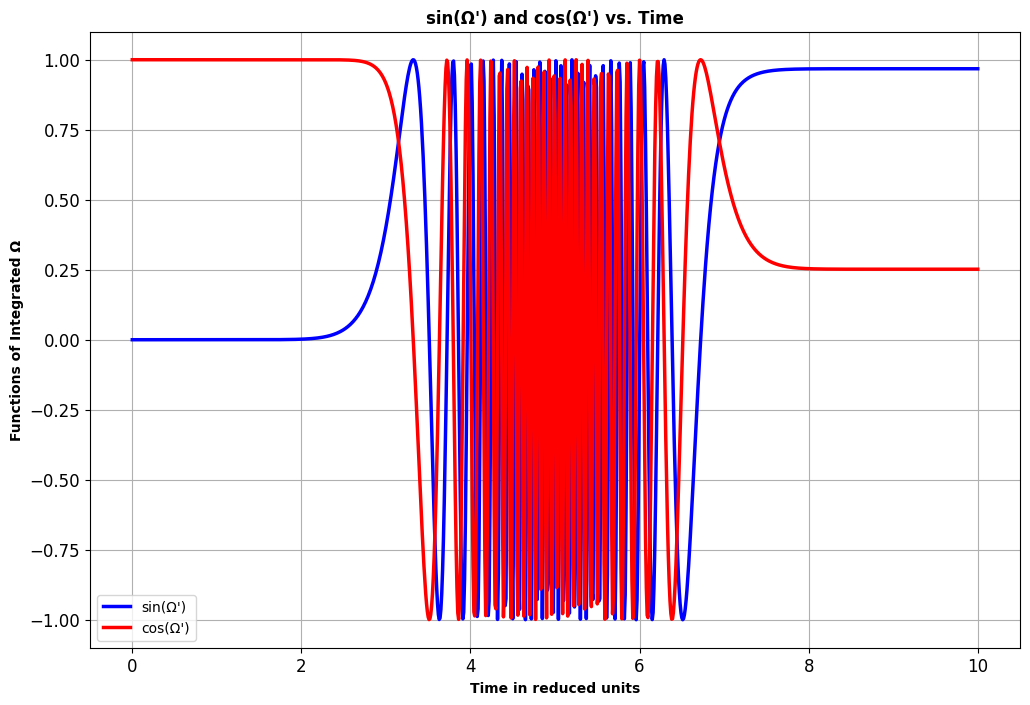

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz

def Omega(t):
    """ Define the pulse profile Omega(t). """
    Omega_0 = 100
    tau = 5.0
    sigma = 1.0
    return Omega_0 * np.exp(- (t - tau)**2 / sigma**2)

# Parameters
t0 = 0  # Initial time
t_end = 10  # Final time
h = 0.01  # Time step

# Time values
t_values = np.arange(t0, t_end + h, h)

# Compute Omega(t)
Omega_values = Omega(t_values)

# Compute the integral of Omega(t) using cumulative trapezoidal integration
Omega_prime = cumtrapz(Omega_values, t_values, initial=0)

# Compute sin(Omega') and cos(Omega')
sin_Omega_prime = np.sin(Omega_prime)
cos_Omega_prime = np.cos(Omega_prime)

# Plot sin(Omega') and cos(Omega')
plt.figure(figsize=(12, 8))

# Plot sin(Omega') with bold line
plt.plot(t_values, sin_Omega_prime, label="sin(Ω')", color='blue', linewidth=2.5)

# Plot -cos(Omega') with bold line
plt.plot(t_values, cos_Omega_prime, label="cos(Ω')", color='red', linewidth=2.5)

plt.xlabel('Time in reduced units', fontweight='bold')
plt.ylabel('Functions of Integrated Ω', fontweight='bold')
plt.title("sin(Ω') and cos(Ω') vs. Time", fontweight='bold')

# Make axis numbers bold
plt.tick_params(axis='both', which='major', labelsize=12)

plt.legend()
plt.grid(True)
plt.show()
